# Tutorial 2
### Clustering `Epochs`

In [1]:
import epoch_tools as et
import mne
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Epochs object from tutorial 1
epochs = et.Epochs.load_epochs('tutorials/test_data/tutorial1_Epochs-taini-epo.pkl')

Reading d:\RA\custom_libs\epoch_tools\tutorials\test_data\tutorial1_Epochs-mne-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4999.45 ms
        0 CTF compensation matrices available
Adding metadata with 257 columns
152 matching events found
No baseline correction applied
0 projection items activated


## Dimensionality reduction methods

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


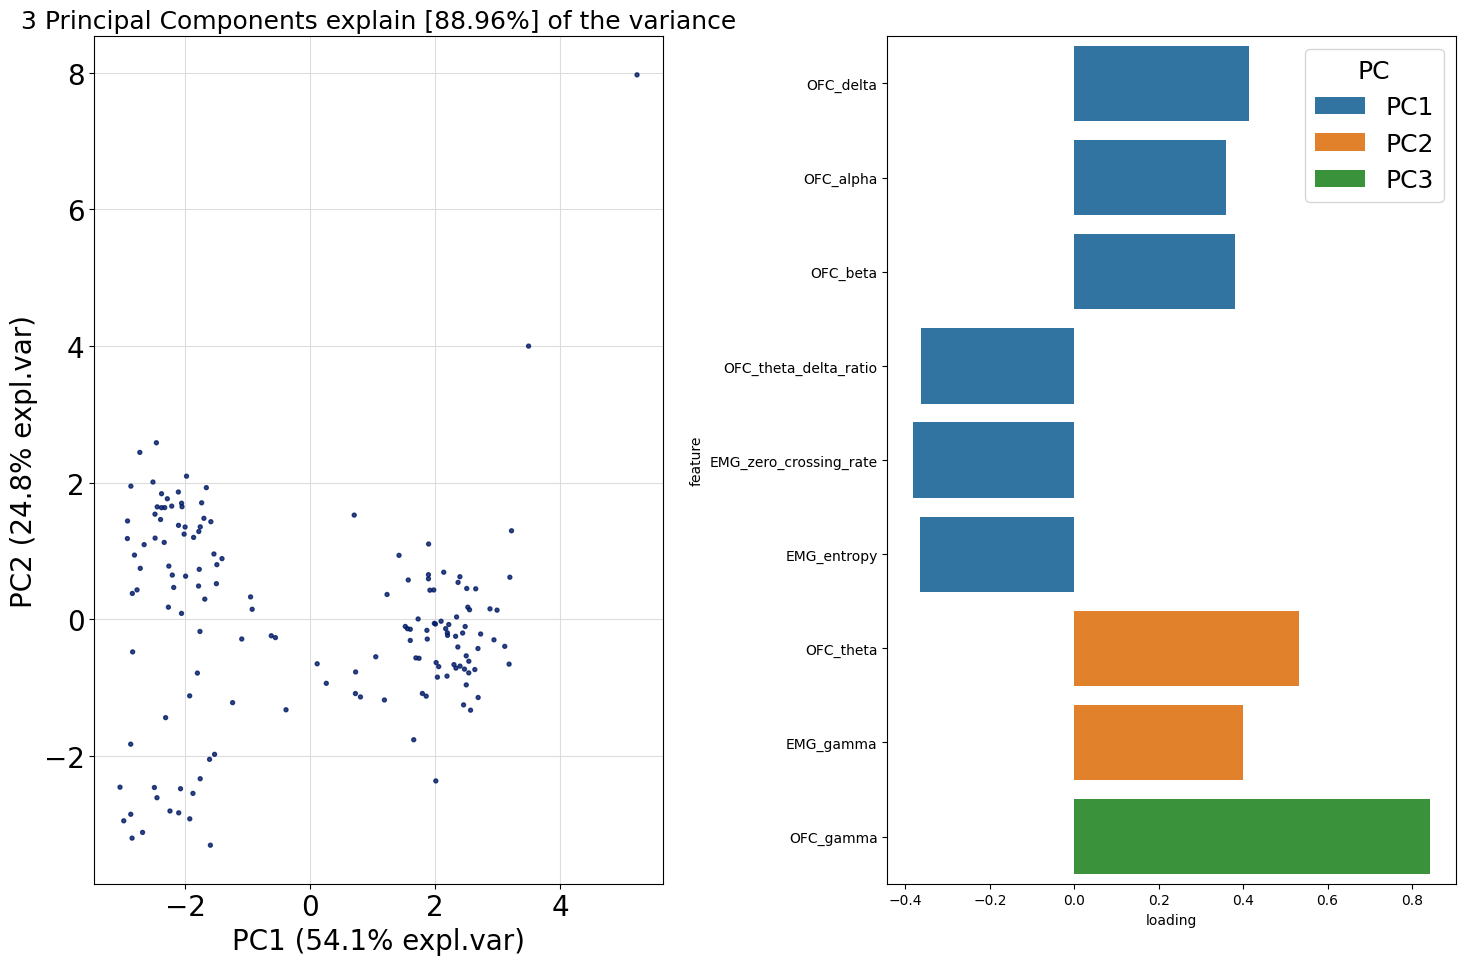

In [4]:
epochs.plot_pca(n_components=3)

c:\Users\basil\anaconda3\envs\taini_epochs\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

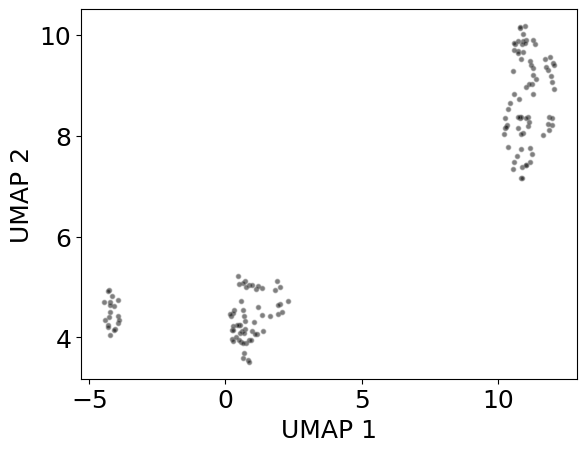

In [5]:
epochs.plot_umap(n_components=3)

<Axes: xlabel='t-SNE 1', ylabel='t-SNE 2'>

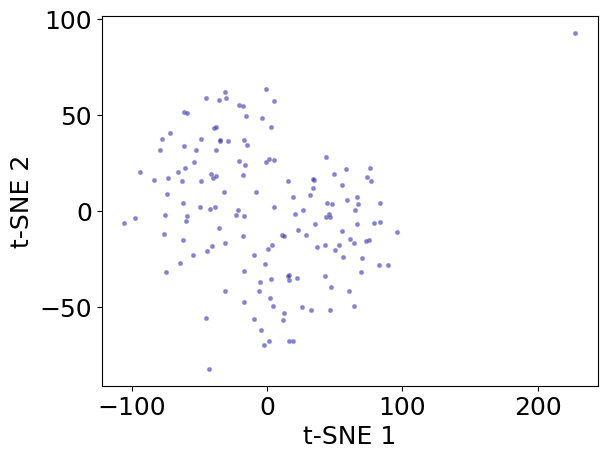

In [6]:
epochs.plot_tsne(n_components=3)

<Axes: title={'center': 'Feature Correlation Matrix'}>

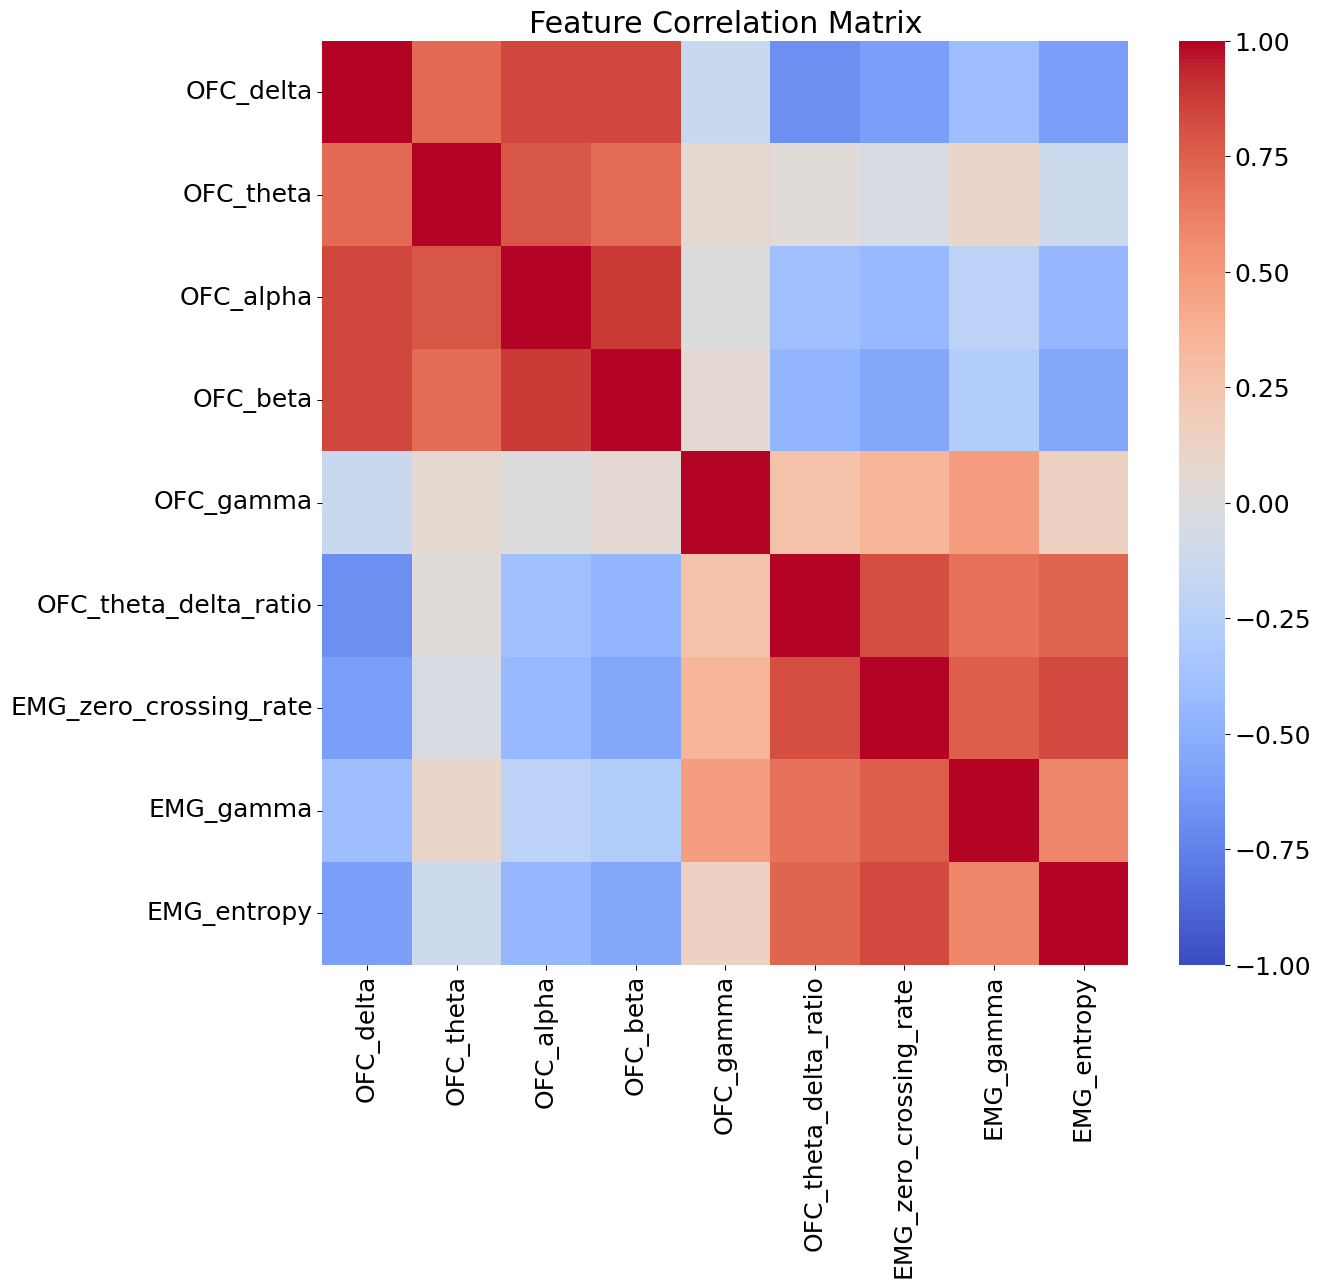

In [7]:
epochs.plot_feature_correlation()

## Clustering
Clustering is done by first applying dimensionality reduction (if desired), and then applying a clustering algorithm (kmeans or hdbscan). Each hyperparameter can be passed as a dictionary as shown below

In [8]:
reducer = "umap"
reducer_params = {"n_components": 3}

clusterer = "hdbscan"
clusterer_params = {"min_cluster_size": 10}

epochs.cluster_data(
    reducer = reducer,
    clusterer = clusterer,
    reducer_params = reducer_params,
    clusterer_params = clusterer_params
)

c:\Users\basil\anaconda3\envs\taini_epochs\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\basil\anaconda3\envs\taini_epochs\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\basil\anaconda3\envs\taini_epochs\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


We can visualize the result with a UMAP plot, now that the cluster labels have been assigned


c:\Users\basil\anaconda3\envs\taini_epochs\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

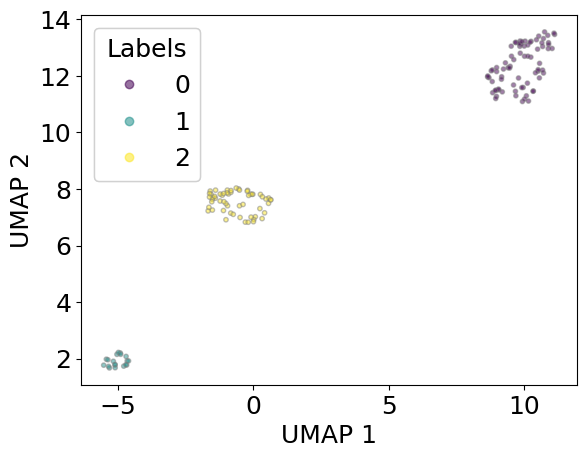

In [9]:
epochs.plot_umap(**reducer_params)

Next step is interpreting the clusters, which is done on the next tutorial.

In [11]:
epochs.save_epochs("tutorials/test_data/tutorial2_Epochs-taini-epo.pkl", overwrite=True)

Overwriting existing file.
